In [133]:
!pip install pyshp

In [0]:
!pip install PyDrive

In [0]:
!pip install geopandas

In [0]:
!pip install rasterio

In [0]:
!pip install descartes

In [0]:
def Init_PyDrive():
  global ID_BY_NAME
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  auth.authenticate_user()
  global gauth
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  global drive
  drive = GoogleDrive(gauth)
  ID_BY_NAME = dict()
  file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
  for i in file_list:
    print(i['title'])
    ID_BY_NAME[i['title']] = i['id']

In [139]:
Init_PyDrive()

mask2.tif
maskkk.tif
maskk
newbuilding-polygon.qpj
newbuilding-polygon.prj
GTif
newbuilding-polygon.shx
newbuilding-polygon.dbf
newbuilding-polygon.shp
moscow.tif
Colab Notebooks
2_5199711382492152624
2_5470067633766269530.ipynb
2_5470067633766269530.ipynb
2_5411178031500755567
2_5411178031500755567
2_5411178031500755567
ДЗ1 - Nick DN.pdf
2_5379653744642229264.S
2_5379653744642229264.S
2_5379653744642229264.S
2_5375356758711599669.S
2_5375356758711599669.S
2_5375356758711599669.S
2_5355078371271246589.S
2_5343541217235829639
2_5339432681585246730.c
2_5339432681585246730.c
2_5339432681585246729.c
2_5458579292034171376.c
Копия Проекты ПМИ 2018/19 уч г
2_5352898567994344109.ipynb
2_5352898567994344109.ipynb
2_5352898567994344109.ipynb
Paragraph_unit11
buchberger.pdf
Untitled document
2_5193089616663544009.txt
2_5193089616663544009.txt
ДжаинНикита174
Упражнение 228
Упражнение 228
Untitled document
DSC_0202_1.mov
Каждый из нас не раз на своем жизненном пути оборачивался к своему прошлому, к

In [0]:
def Download_File(filename, savename):
  file = drive.CreateFile({'id': ID_BY_NAME[filename]})
  file.GetContentFile(savename)

In [0]:
def Upload_File(filename, drivename):
  file = drive.CreateFile({"title": drivename})
  file.SetContentFile(filename)
  file.Upload()

In [0]:
Download_File("moscow.tif", "moscow.tif")
Download_File("newbuilding-polygon.shp", "newbuilding-polygon.shp")
Download_File("newbuilding-polygon.dbf", "newbuilding-polygon.dbf")
Download_File("newbuilding-polygon.shx", "newbuilding-polygon.shx")
Download_File("newbuilding-polygon.prj", "newbuilding-polygon.prj")
Download_File("newbuilding-polygon.qpj", "newbuilding-polygon.qpj")

In [0]:
import operator
import numpy as np
from osgeo import gdal, gdal_array, osr, gdalnumeric, ogr
import shapefile
import Image
import ImageDraw
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from descartes import PolygonPatch
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist

In [0]:
raster_path  = './moscow.tif'
#srcArray = gdal_array.LoadFile(raster_path)
srcImage = gdal.Open(raster_path)
geoTrans = srcImage.GetGeoTransform()
shapefile_path = './newbuilding-polygon.shp'
shapef = shapefile.Reader("%s" % shp_path)

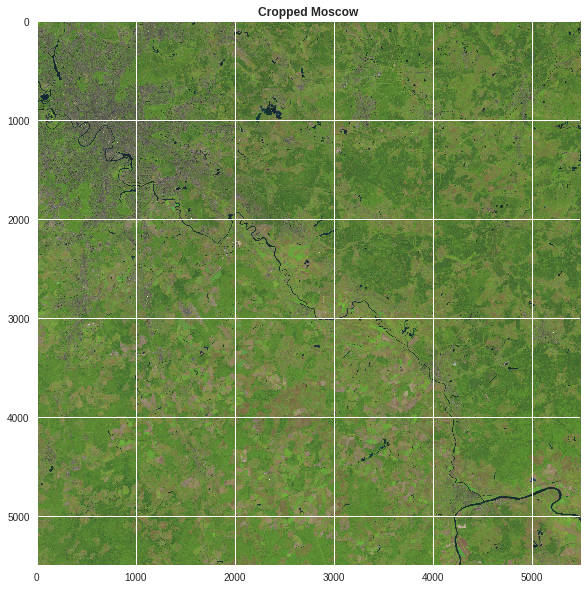

In [145]:
plt.figure(figsize=(10,10))
with rio.open(raster_path) as src:
    bb = src.read()
show(bb, title="Moscow")
plt.show()

In [146]:
len(shapef)

196494

In [147]:
geoTrans

(399960.0, 20.0, 0.0, 6200040.0, 0.0, -20.0)

<Figure size 1080x1080 with 0 Axes>

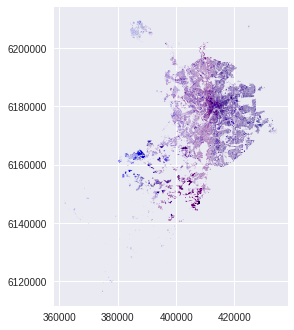

In [148]:
plt.figure(figsize=(15,15))
grid = gpd.read_file(shapefile_path)
my_map = grid.plot(linewidth=0.1, cmap="Reds", scheme="quantiles", k=11, alpha=1)
grid.plot(ax=my_map, color="blue", linewidth=2.5)
plt.show()

In [0]:
def world2Pixel(geoMatrix, x, y):
  """
  Uses a gdal geomatrix (gdal.GetGeoTransform()) to calculate
  the pixel location of a geospatial coordinate 
  """
  ulX = geoMatrix[0]
  ulY = geoMatrix[3]
  xDist = geoMatrix[1]
  yDist = geoMatrix[5]
  rtnX = geoMatrix[2]
  rtnY = geoMatrix[4]
  pixel = int((x - ulX) / xDist)
  line = int((ulY - y) / xDist)
  return (pixel, line) 


In [0]:
minX, maxX, maxY, minY = int(g[0]/g[1]), int((g[0] + srcImage.RasterXSize * g[1])/g[1]),
                                    int(g[3]/abs(g[5])), int((g[3] + srcImage.RasterYSize * g[-1])/abs(g[5]))
#ulX, ulY = world2Pixel(geoTrans, minX, maxY)
#lrX, lrY = world2Pixel(geoTrans, maxX, minY)

In [0]:
pxWidth = maxX - minX
pxHeight = maxY - minY

In [153]:
print(pxWidth, pxHeight)

5490 5490


In [154]:
pixels = []
length = len(shapef)
rasterPoly = Image.new("L", (pxWidth, pxHeight), 1)
rasterize = ImageDraw.Draw(rasterPoly)
for i in range(length):
    for point in shapef.shape(i).points:
        x, y = world2Pixel(geoTrans, point[0], point[1])
        pixels.append((x, y))
    rasterize.polygon(pixels, 0)
    pixels = []

228


In [0]:
def imageToArray(i):
    """
    Converts a Python Imaging Library array to a gdal_array image.
    """
    a = gdal_array.numpy.frombuffer(i.tobytes(), 'b')
    a.shape = i.im.size[1], i.im.size[0]
    return a

In [0]:
mask = imageToArray(rasterPoly)

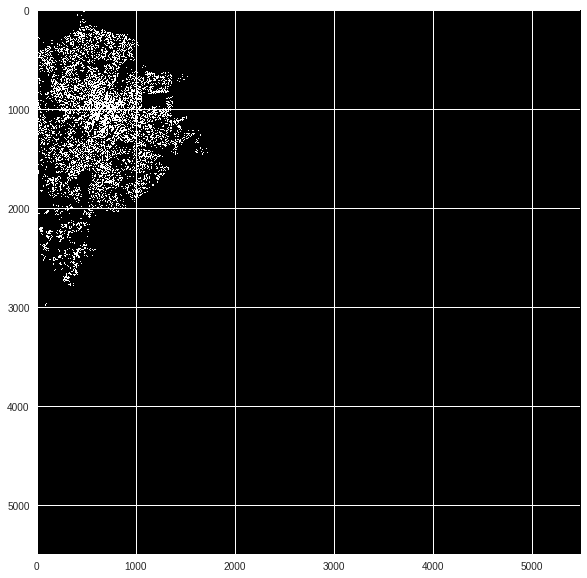

In [157]:
plt.figure(figsize=(10,10))
imshow(mask)
plt.show()

In [0]:
gtiffDriver = gdal.GetDriverByName( 'GTiff' )
dt = gdal.GDT_Byte
outClip = gtiffDriver.Create("mask.tif", mask.shape[1], mask.shape[0], 1, dt)

In [0]:
Upload_File('mask.tif', 'mask2.tif')
